In [1]:
import os
import cv2
import numpy as np
import time
import random

In [2]:

root_path = os.getcwd()
train_path = root_path+ '/cats_and_dogs_filtered/train'
test_path = root_path+ '/cats_and_dogs_filtered/test'

In [3]:
img_width = 128
img_height = 128
BATCH_SIZE = 32


def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(img_width, img_height))
    return img

In [4]:
X_train,Y_train = [],[]
X_test,Y_test = [],[]

def load_test_img(img_path):

    temp_X, temp_Y = [], []
    for cur_class in os.listdir(img_path):
        label = ""
        if cur_class == '.DS_Store':
            continue
        
        if cur_class == "cats":
            label = [1,0]
        else:
            label = [0,1]

        for filename in os.listdir(img_path+"/"+cur_class):
            if filename == '.DS_Store':
                continue

            full_img_path = img_path+"/"+cur_class+"/"+filename
            img = load_img(full_img_path)
            temp_X.append(img)
            temp_Y.append(label)
            
    return np.array(temp_X), np.array(temp_Y)

In [5]:
X_train,Y_train = load_test_img(train_path)
X_test,Y_test = load_test_img(test_path)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (2752, 128, 128, 3)
Y_train shape:  (2752, 2)
X_test shape:  (248, 128, 128, 3)
Y_test shape:  (248, 2)


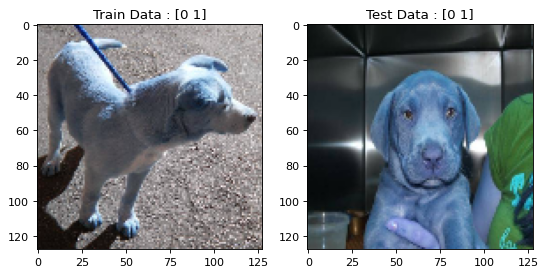

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

index = random.randint(0, len(X_test)-1)

figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title(f"Train Data : {Y_train[index]}")
plt.imshow(X_train[index])


plt.subplot(1,2,2)
plt.title(f"Test Data : {Y_test[index]}")
plt.imshow(X_test[index])



plt.show()

### MLP model training

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Rescaling


In [8]:
mlp_model = Sequential([
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    
    Flatten(),
    
    Dense(67, activation='relu'),
    
    Dense(2, activation='sigmoid')
])

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # binary_crossentropy for binary classification
                  metrics=['accuracy'])
mlp_model.summary()

/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-01 12:10:37.349810: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-08-01 12:10:37.349837: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-08-01 12:10:37.349842: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1754025037.349853 15824104 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1754025037.349871 15824104 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GP

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 67)             │     3,293,251 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,293,387 (12.56 MB)

 Trainable params: 3,293,387 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
mlp_history = mlp_model.fit(X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/10


2025-08-01 12:10:37.661142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5043 - loss: 26.6018 - val_accuracy: 0.5403 - val_loss: 1.2238
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4972 - loss: 1.4506 - val_accuracy: 0.5403 - val_loss: 11.3943
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4922 - loss: 3.4826 - val_accuracy: 0.5403 - val_loss: 1.4138
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4975 - loss: 0.9600 - val_accuracy: 0.5403 - val_loss: 0.7908
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4801 - loss: 0.7827 - val_accuracy: 0.5403 - val_loss: 2.6817
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5048 - loss: 1.4496 - val_accuracy: 0.5403 - val_loss: 1.9393
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4867 - loss: 1.1568 - val_accuracy: 0.5403 - val_loss: 0.7922
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5021 - loss: 0.9849 - val_accuracy: 0.5403 - val_loss: 

In [10]:
print("--- Evaluating MLP on Test Data ---")
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, Y_test)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")


--- Evaluating MLP on Test Data ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2639 - loss: 1.1616  
MLP Test Accuracy: 0.5403


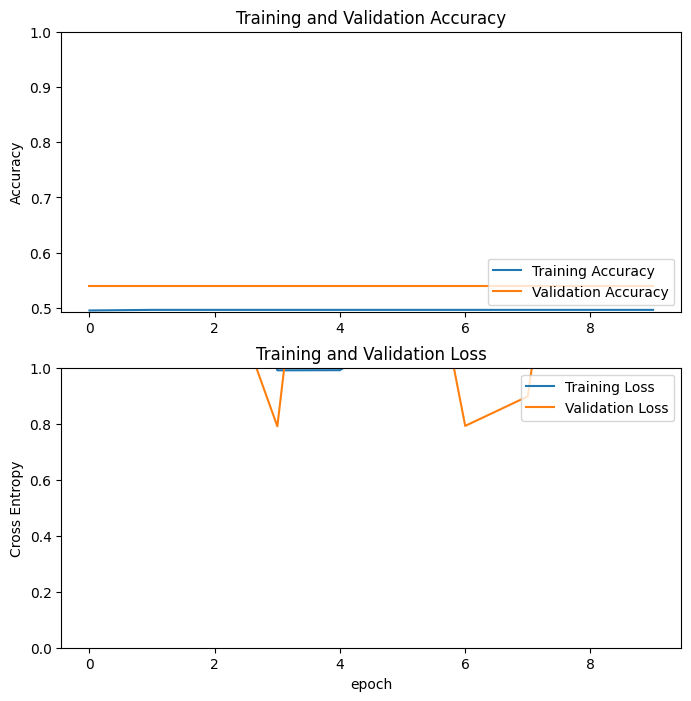

In [18]:
import matplotlib.pyplot as plt
acc = mlp_history.history['accuracy']
val_acc = mlp_history.history['val_accuracy']

loss = mlp_history.history['loss']
val_loss = mlp_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### CNN model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [12]:
model = Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),


    # Convolutional blocks 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    
    Dense(2, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # binary_crossentropy for binary classification
              metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10, # Train for more epochs on a real dataset
    batch_size=BATCH_SIZE
)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5046 - loss: 0.9479 - val_accuracy: 0.4879 - val_loss: 0.6977
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5741 - loss: 0.6760 - val_accuracy: 0.6169 - val_loss: 0.6617
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6769 - loss: 0.6023 - val_accuracy: 0.5323 - val_loss: 0.7260
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7256 - loss: 0.5494 - val_accuracy: 0.6411 - val_loss: 0.6419
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7381 - loss: 0.5320 - val_accuracy: 0.6573 - val_loss: 0.6452
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7875 - loss: 0.4643 - val_accuracy: 0.6129 - val_loss: 0.7070
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7836 - loss: 0.4979 - val_accuracy: 0.5565 - val_loss: 1.2333
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5959 - loss: 1.2327 - val_accuracy: 0.6210 - v

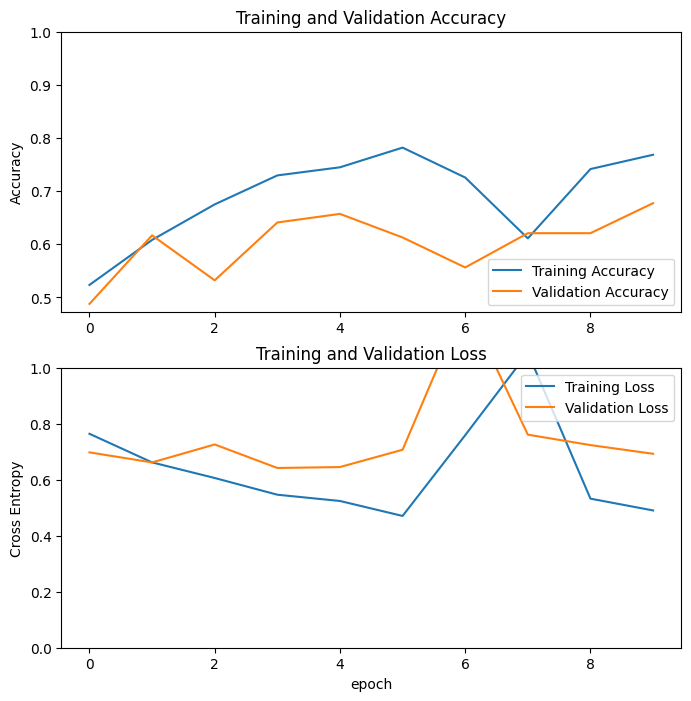

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()